In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
%env QPROF_DATA_PATH=/home/simonpf/Dendrite/UserAreas/Simon/gprof

env: QPROF_DATA_PATH=/home/simonpf/Dendrite/UserAreas/Simon/gprof


# Training data

The interface to the training data is realized using pytorchs Dataset
class. The data object provides access to single samples in the training
data.

In [2]:
from qprof.data import RainRates
qprof_path = os.environ["QPROF_DATA_PATH"]
path = os.path.join(qprof_path, "training_data_3.nc")
data = RainRates(path)

For the actual training, the data object needs to be wrapped in a data loader, which generates batches
from the training data.

In [9]:
import torch
from torch.utils.data import DataLoader, random_split
n_train = int(0.90 * len(data))
n_val = len(data) - n_train
training_data, validation_data = random_split(data, [n_train, n_val])
training_loader = DataLoader(training_data, batch_size = 256)
validation_loader = DataLoader(validation_data, batch_size = 256)

# QRNN training

Training the QRNN is straight forward.

In [43]:
qrnn.main

Sequential(
  (fc_0): Linear(in_features=13, out_features=128, bias=True)
  (act_0): ReLU()
  (fc_1): Linear(in_features=128, out_features=128, bias=True)
  (act_1): ReLU()
  (fc_2): Linear(in_features=128, out_features=13, bias=True)
)

In [49]:
from qprof.models import QRNN
quantiles = [0.01, 0.05, 0.15, 0.25, 0.35, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.95, 0.99]
qrnn = QRNN(13, quantiles, depth = 5, width = 256)
qrnn.train(training_loader, validation_loader)
qrnn.train(training_loader, validation_loader)
qrnn.train(training_loader, validation_loader)
qrnn.train(training_loader, validation_loader)
qrnn.train(training_loader, validation_loader)
qrnn.train(training_loader, validation_loader)

# Evaluation

We briefly compute the calibration on the validation set.

In [50]:
intervals, frequencies = qrnn.calibration(validation_loader)

<module 'matplotlib.pyplot' from '/home/simonpf/build/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

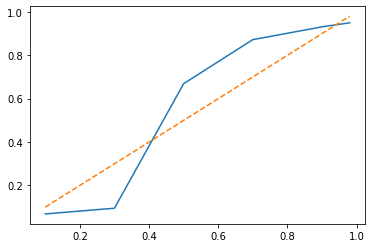

In [47]:
plt.plot(intervals, frequencies)
plt.plot(intervals, intervals, ls = "--")
plt

In [26]:
qrnn.quantiles

array([0.01, 0.05, 0.15, 0.25, 0.35, 0.45, 0.5 , 0.55, 0.65, 0.75, 0.85,
       0.95, 0.99])

In [24]:
for i in range(6):
    print(qrnn.quantiles[i])
for i in range(6):
    print(qrnn.quantiles[-(i + 1)])

0.01
0.05
0.15
0.25
0.35
0.45
0.99
0.95
0.85
0.75
0.65
0.55


In [48]:
qrnn.predict(data[0][0].view(1, -1))

tensor([[-1.4849e-03, -2.1295e-03, -3.5743e-04, -3.1928e-04,  2.8094e-05,
          3.2295e-05,  1.5439e-04, -1.9485e-05,  6.4177e-05,  1.5721e-04,
          1.5614e-03,  7.4432e-03,  1.4907e-01]], grad_fn=<AddmmBackward>)